In [2]:
%load_ext autoreload
%autoreload 2

import polars as pl
import networkx as nx
import numpy as np

from src.base_classes.omic_data_loader import OmicDataLoader
from src.data_managers.concat import CatOmicDataManager

from src.gnn_utils.interactions import (
    get_mirna_genes_circrna_interactions,
    get_mirna_gene_interactions,
    gg_interactions,
    pp_interactions,
    tf_links
)
import torch

In [39]:
mrna_loader = OmicDataLoader(
    data_dir="mds_data/splits_74_risk/mrna",
)
mirna_loader = OmicDataLoader(
    data_dir="mds_data/splits_74_risk/mirna_genes",
)
circrna_loader = OmicDataLoader(
    data_dir="mds_data/splits_74_risk/circrna",
)
# pirna_loader = OmicDataLoader(
#     data_dir="mds_data/splits_74/pirna",
# )
te_loader = OmicDataLoader(
    data_dir="mds_data/splits_74_risk/te_counts",
)

omic_data_loaders = {
    "mrna": mrna_loader,
    # "mirna": mirna_loader,
    # "circrna": circrna_loader,
    # # # "pirna": pirna_loader,
    # "te": te_loader,
}
odm = CatOmicDataManager(omic_data_loaders, n_splits=5)

In [40]:
from src.evals.xgboost import XGBoostEvaluator

xgb_eval = XGBoostEvaluator(
    data_manager=odm,
    n_trials=80,
    verbose=True,
)
_ = xgb_eval.evaluate()
xgb_eval.print_best_results()
xgb_eval.print_best_parameters()
# xgb_eval.save_results(results_file=save_folder, row_name="XGBoost")

[I 2024-12-09 19:58:09,744] A new study created in memory with name: no-name-def23373-2b85-40f0-911a-abb72c743692
[I 2024-12-09 19:58:09,848] Trial 0 finished with value: 0.2149085674931129 and parameters: {'booster': 'gbtree', 'lambda': 0.2300983562595843, 'alpha': 0.08030117752600043, 'max_depth': 5, 'eta': 3.885912021696409e-06, 'gamma': 0.00027002475273225777, 'grow_policy': 'depthwise'}. Best is trial 0 with value: 0.2149085674931129.
[I 2024-12-09 19:58:09,904] Trial 1 finished with value: 0.37095020559504877 and parameters: {'booster': 'gblinear', 'lambda': 0.06455242545513513, 'alpha': 0.17450031515977754}. Best is trial 1 with value: 0.37095020559504877.
[I 2024-12-09 19:58:10,005] Trial 2 finished with value: 0.21534604040404037 and parameters: {'booster': 'gbtree', 'lambda': 0.00027604775277442376, 'alpha': 2.770008030113481e-05, 'max_depth': 2, 'eta': 0.003840954702499889, 'gamma': 1.8438492145637324e-06, 'grow_policy': 'depthwise'}. Best is trial 1 with value: 0.3709502055

New best score: 0.215
Best model performance:
Accuracy: 0.620 ± 0.073
F1 Macro: 0.582 ± 0.133
F1 Weighted: 0.595 ± 0.108
[{'acc': 0.6363636363636364, 'f1_macro': np.float64(0.6333333333333333), 'f1_weighted': np.float64(0.6363636363636364)}, {'acc': 0.7272727272727273, 'f1_macro': np.float64(0.7272727272727273), 'f1_weighted': np.float64(0.7272727272727273)}, {'acc': 0.6363636363636364, 'f1_macro': np.float64(0.6333333333333333), 'f1_weighted': np.float64(0.6303030303030303)}, {'acc': 0.5, 'f1_macro': np.float64(0.3333333333333333), 'f1_weighted': np.float64(0.4)}, {'acc': 0.6, 'f1_macro': np.float64(0.5833333333333333), 'f1_weighted': np.float64(0.5833333333333333)}]
New best score: 0.371
Best model performance:
Accuracy: 0.735 ± 0.077
F1 Macro: 0.708 ± 0.099
F1 Weighted: 0.714 ± 0.102
[{'acc': 0.7272727272727273, 'f1_macro': np.float64(0.717948717948718), 'f1_weighted': np.float64(0.7226107226107227)}, {'acc': 0.7272727272727273, 'f1_macro': np.float64(0.717948717948718), 'f1_weighte

[I 2024-12-09 19:58:10,112] Trial 3 finished with value: 0.21534604040404037 and parameters: {'booster': 'dart', 'lambda': 3.622115446545445e-05, 'alpha': 0.00011653070777404339, 'max_depth': 5, 'eta': 0.00018322849465660784, 'gamma': 8.623271870789052e-05, 'grow_policy': 'depthwise', 'sample_type': 'weighted', 'normalize_type': 'tree', 'rate_drop': 0.0004119048322856913, 'skip_drop': 0.24990078945120928}. Best is trial 1 with value: 0.37095020559504877.
[I 2024-12-09 19:58:10,222] Trial 4 finished with value: 0.21534604040404037 and parameters: {'booster': 'gbtree', 'lambda': 9.469995601878194e-08, 'alpha': 0.0025467307920998485, 'max_depth': 8, 'eta': 0.00906824861969361, 'gamma': 0.001983670437627528, 'grow_policy': 'lossguide'}. Best is trial 1 with value: 0.37095020559504877.
[I 2024-12-09 19:58:10,309] Trial 5 finished with value: 0.21534604040404037 and parameters: {'booster': 'dart', 'lambda': 0.030528246433324455, 'alpha': 0.04118601318664808, 'max_depth': 2, 'eta': 0.01169662

New best score: 0.408
Best model performance:
Accuracy: 0.755 ± 0.074
F1 Macro: 0.732 ± 0.095
F1 Weighted: 0.739 ± 0.085
[{'acc': 0.8181818181818182, 'f1_macro': np.float64(0.8166666666666667), 'f1_weighted': np.float64(0.8151515151515153)}, {'acc': 0.8181818181818182, 'f1_macro': np.float64(0.8166666666666667), 'f1_weighted': np.float64(0.8181818181818182)}, {'acc': 0.6363636363636364, 'f1_macro': np.float64(0.6333333333333333), 'f1_weighted': np.float64(0.6303030303030303)}, {'acc': 0.7, 'f1_macro': np.float64(0.6000000000000001), 'f1_weighted': np.float64(0.64)}, {'acc': 0.8, 'f1_macro': np.float64(0.7916666666666667), 'f1_weighted': np.float64(0.7916666666666667)}]
New best score: 0.423
Best model performance:
Accuracy: 0.756 ± 0.068
F1 Macro: 0.746 ± 0.064
F1 Weighted: 0.750 ± 0.067
[{'acc': 0.7272727272727273, 'f1_macro': np.float64(0.7272727272727273), 'f1_weighted': np.float64(0.7272727272727273)}, {'acc': 0.8181818181818182, 'f1_macro': np.float64(0.8166666666666667), 'f1_weig

[I 2024-12-09 19:58:10,830] Trial 11 finished with value: 0.37921780277986483 and parameters: {'booster': 'gblinear', 'lambda': 7.11610528873135e-06, 'alpha': 1.3512393440168612e-08}. Best is trial 10 with value: 0.42309798923626546.
[I 2024-12-09 19:58:10,899] Trial 12 finished with value: 0.49764519230326676 and parameters: {'booster': 'gblinear', 'lambda': 0.001793835282499067, 'alpha': 1.6309197289901613e-08}. Best is trial 12 with value: 0.49764519230326676.
[I 2024-12-09 19:58:10,984] Trial 13 finished with value: 0.49764519230326676 and parameters: {'booster': 'gblinear', 'lambda': 0.002990553929398435, 'alpha': 1.3694445374055913e-08}. Best is trial 12 with value: 0.49764519230326676.
[I 2024-12-09 19:58:11,049] Trial 14 finished with value: 0.49764519230326676 and parameters: {'booster': 'gblinear', 'lambda': 0.0015275329873965448, 'alpha': 3.0317216419987807e-07}. Best is trial 12 with value: 0.49764519230326676.


New best score: 0.498
Best model performance:
Accuracy: 0.795 ± 0.064
F1 Macro: 0.791 ± 0.061
F1 Weighted: 0.792 ± 0.063
[{'acc': 0.7272727272727273, 'f1_macro': np.float64(0.7272727272727273), 'f1_weighted': np.float64(0.7272727272727273)}, {'acc': 0.8181818181818182, 'f1_macro': np.float64(0.8166666666666667), 'f1_weighted': np.float64(0.8181818181818182)}, {'acc': 0.7272727272727273, 'f1_macro': np.float64(0.7272727272727273), 'f1_weighted': np.float64(0.7272727272727273)}, {'acc': 0.9, 'f1_macro': np.float64(0.8901098901098901), 'f1_weighted': np.float64(0.8967032967032967)}, {'acc': 0.8, 'f1_macro': np.float64(0.7916666666666667), 'f1_weighted': np.float64(0.7916666666666667)}]


[I 2024-12-09 19:58:11,137] Trial 15 finished with value: 0.49764519230326676 and parameters: {'booster': 'gblinear', 'lambda': 0.003663393287678457, 'alpha': 9.29816553705695e-08}. Best is trial 12 with value: 0.49764519230326676.
[I 2024-12-09 19:58:11,203] Trial 16 finished with value: 0.4643536045844739 and parameters: {'booster': 'gblinear', 'lambda': 0.0052928496782756835, 'alpha': 1.7619305717329072e-05}. Best is trial 12 with value: 0.49764519230326676.
[I 2024-12-09 19:58:11,267] Trial 17 finished with value: 0.49764519230326676 and parameters: {'booster': 'gblinear', 'lambda': 0.0004259797206945308, 'alpha': 1.7244897247829244e-07}. Best is trial 12 with value: 0.49764519230326676.
[I 2024-12-09 19:58:11,352] Trial 18 finished with value: 0.49764519230326676 and parameters: {'booster': 'gblinear', 'lambda': 0.014265213435840533, 'alpha': 1.0469834144145482e-08}. Best is trial 12 with value: 0.49764519230326676.
[I 2024-12-09 19:58:11,418] Trial 19 finished with value: 0.49764

New best score: 0.531
Best model performance:
Accuracy: 0.813 ± 0.098
F1 Macro: 0.808 ± 0.098
F1 Weighted: 0.809 ± 0.100
[{'acc': 0.8181818181818182, 'f1_macro': np.float64(0.8166666666666667), 'f1_weighted': np.float64(0.8151515151515153)}, {'acc': 0.9090909090909091, 'f1_macro': np.float64(0.9090909090909091), 'f1_weighted': np.float64(0.9090909090909091)}, {'acc': 0.6363636363636364, 'f1_macro': np.float64(0.6333333333333333), 'f1_weighted': np.float64(0.6303030303030303)}, {'acc': 0.9, 'f1_macro': np.float64(0.8901098901098901), 'f1_weighted': np.float64(0.8967032967032967)}, {'acc': 0.8, 'f1_macro': np.float64(0.7916666666666667), 'f1_weighted': np.float64(0.7916666666666667)}]


[I 2024-12-09 19:58:13,327] Trial 40 finished with value: 0.2149085674931129 and parameters: {'booster': 'dart', 'lambda': 2.6515101769985515e-06, 'alpha': 7.129436141730771e-05, 'max_depth': 9, 'eta': 1.414156948889391e-07, 'gamma': 2.7475838662482536e-05, 'grow_policy': 'lossguide', 'sample_type': 'uniform', 'normalize_type': 'forest', 'rate_drop': 7.474085259201593e-08, 'skip_drop': 0.00016834055832557575}. Best is trial 38 with value: 0.5310972919738361.
[I 2024-12-09 19:58:13,392] Trial 41 finished with value: 0.4630809911198852 and parameters: {'booster': 'gblinear', 'lambda': 0.00020113812209216132, 'alpha': 5.248831944688053e-05}. Best is trial 38 with value: 0.5310972919738361.
[I 2024-12-09 19:58:13,459] Trial 42 finished with value: 0.4955518858585637 and parameters: {'booster': 'gblinear', 'lambda': 0.0008862861320231146, 'alpha': 0.000545322018892853}. Best is trial 38 with value: 0.5310972919738361.
[I 2024-12-09 19:58:13,550] Trial 43 finished with value: 0.4630809911198

Best model performance:
Accuracy: 0.813 ± 0.098
F1 Macro: 0.808 ± 0.098
F1 Weighted: 0.809 ± 0.100
Best hyperparameters:
{'booster': 'gblinear', 'lambda': 2.3521686738706246e-05, 'alpha': 0.00010276668610730104}


In [41]:
feat_importances = xgb_eval.get_feature_importances(xgb_eval.best_params)

fi_sorted = dict(sorted(feat_importances.items(), key=lambda x: abs(x[1]), reverse=True))

{'acc': 0.8181818181818182, 'f1_macro': np.float64(0.8166666666666667), 'f1_weighted': np.float64(0.8151515151515153)}
{'ENSG00000239839': [1.1874737739562988, -1.1218341588974], 'ENSG00000064687': [0.024222033098340034, -0.02932693064212799], 'ENSG00000254995': [-0.10735443234443665, 0.14090944826602936], 'ENSG00000240247': [0.22038008272647858, -0.3029455840587616], 'ENSG00000163221': [0.3497420847415924, -0.3480638861656189], 'ENSG00000206047': [0.04134868457913399, -0.04968538507819176], 'ENSG00000122224': [0.27372223138809204, -0.18332542479038239], 'ENSG00000188153': [-0.3921641707420349, 0.3554920554161072], 'ENSG00000233822': [0.4107384979724884, -0.37297990918159485], 'ENSG00000091181': [-0.0023242169991135597, 0.0015364006394520402], 'ENSG00000138131': [0.0036851936019957066, -0.0033148517832159996], 'ENSG00000075275': [0.1834111511707306, -0.1728060394525528], 'ENSG00000106976': [-0.01581989973783493, 0.05267617106437683], 'ENSG00000111249': [0.03860456496477127, -0.00631731

In [53]:
mrna = pl.read_csv("mds_data/preprocessed_74/mrna.csv")
mirna = pl.read_csv("mds_data/preprocessed_74/mirna_genes.csv")

mrna_gene = mrna.select("GENE_NAME", "GENE_ID")
mirna_gene = mirna.select("GENE_NAME", "GENE_ID")

# create one big dict to go from id to name
mrna_dict = dict(zip(mrna_gene["GENE_ID"], mrna_gene["GENE_NAME"]))
mirna_dict = dict(zip(mirna_gene["GENE_ID"], mirna_gene["GENE_NAME"]))

# merge the dicts
mrna_dict.update(mirna_dict)

# rename the keys from fi_sorted to the name of the gene if it exists in mrna_dict
fi_nn = {mrna_dict.get(k, k): v for k, v in fi_sorted.items()}

In [54]:
te = pl.read_csv("mds_data/preprocessed_74/te_counts.csv")
te_names = te['TE'].to_list()

# add "TE: " to all te features
te_names = {x : f"TE: {x}" for x in te_names}

# Create a new dictionary with the updated keys
fi_nn = {te_names.get(k, k): v for k, v in fi_nn.items()}

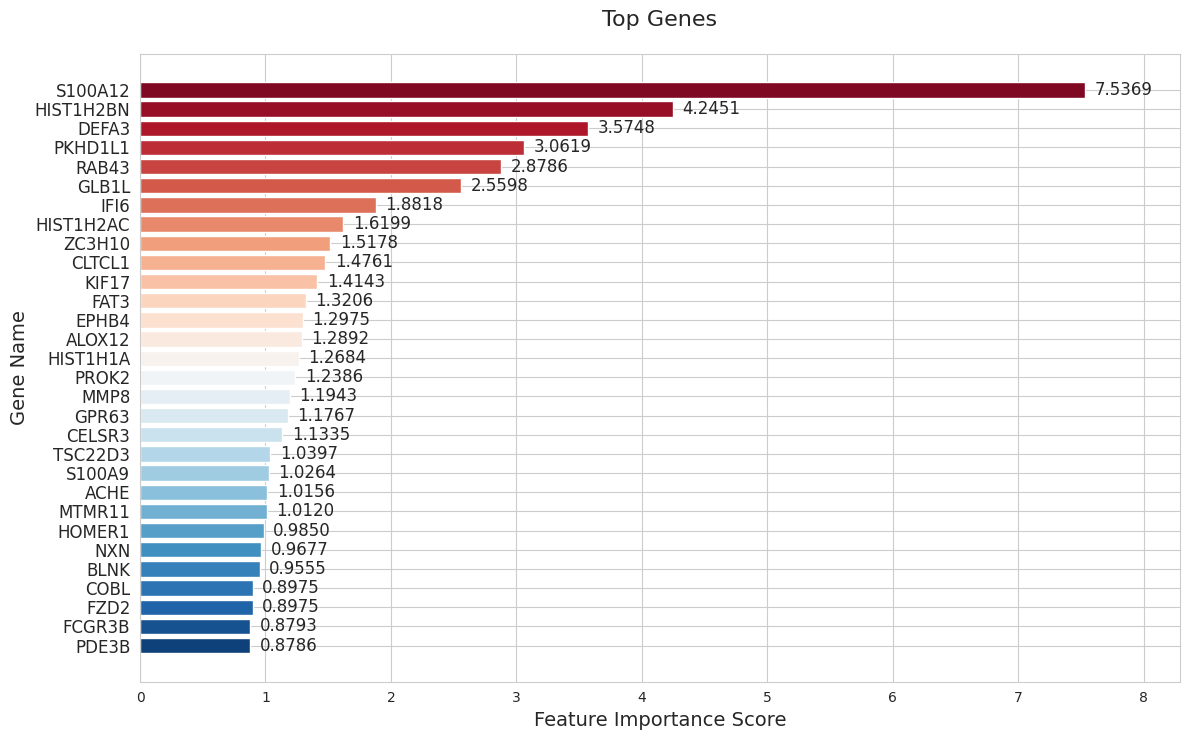

In [55]:
from src.plotting.feature_importance_plot import plot_top_genes

_ = plot_top_genes(
    fi_nn,
    n_genes=30, 
    title="Top Genes",
    save_file="plots/risk/mds_risk_fi_mrna_only.png"
)

In [72]:
mrna_dict = {}
mirna_dict = {}
circrna_dict = {}

# go trough the fi_nn dict and sort it into three lists of mrna, mirna and circrna
for k, v in fi_nn.items():
    if k.startswith("MIR"):
        mirna_dict[k] = v
    elif k.startswith("hsa_circ"):
        circrna_dict[k] = v
    else:
        mrna_dict[k] = v

# keep only top 30 out of each list
n_top_genes = 100
mrna_dict = {k: v for k, v in sorted(mrna_dict.items(), key=lambda item: item[1], reverse=True)[:n_top_genes]}
mirna_dict = {k: v for k, v in sorted(mirna_dict.items(), key=lambda item: item[1], reverse=True)[:n_top_genes]}
circrna_dict = {k: v for k, v in sorted(circrna_dict.items(), key=lambda item: item[1], reverse=True)[:n_top_genes]}

In [77]:
for k, v in mrna_dict.items():
    if k.startswith("HIST"):
        print(k, v)

HIST1H2BN 4.245093017816544
HIST1H2AC 1.6199357211589813
HIST1H1A 1.2683670080441516


In [73]:
mrna_genes = list(mrna_dict.keys())
mirna_genes = list(mirna_dict.keys())
circrna_names = list(circrna_dict.keys())

gg_A = gg_interactions(mrna_genes, mrna_genes)
pp_A = pp_interactions(mrna_genes, mrna_genes)
tf_links_A = tf_links(
    mrna_genes,
    mrna_genes,
    tflinksdb="interaction_data/TFLink_Homo_sapiens_interactions_SS_simpleFormat_v1.0.tsv",
    # tflinksdb="interaction_data/TFLink_Homo_sapiens_interactions_LS_simpleFormat_v1.0.tsv",
)
mrna_A = torch.logical_or(gg_A, pp_A).logical_or(tf_links_A).int()

mirna_gene_A = get_mirna_gene_interactions(mirna_genes, mrna_genes, mirna_mrna_db="interaction_data/mirna_genes_mrna.csv")

# interactions are in a shape of (mirnas, circrnas)
circrna_mirna_A = get_mirna_genes_circrna_interactions(
    mirna_names=mirna_genes,
    circrna_names=circrna_names,
    mirna_circrna_interactions="interaction_data/circrna_mirna_interactions_mirbase.csv",
)

mrna_A.sum(), mirna_gene_A.sum(), circrna_mirna_A.sum()

(tensor(80), tensor(0.), tensor(0.))

7688


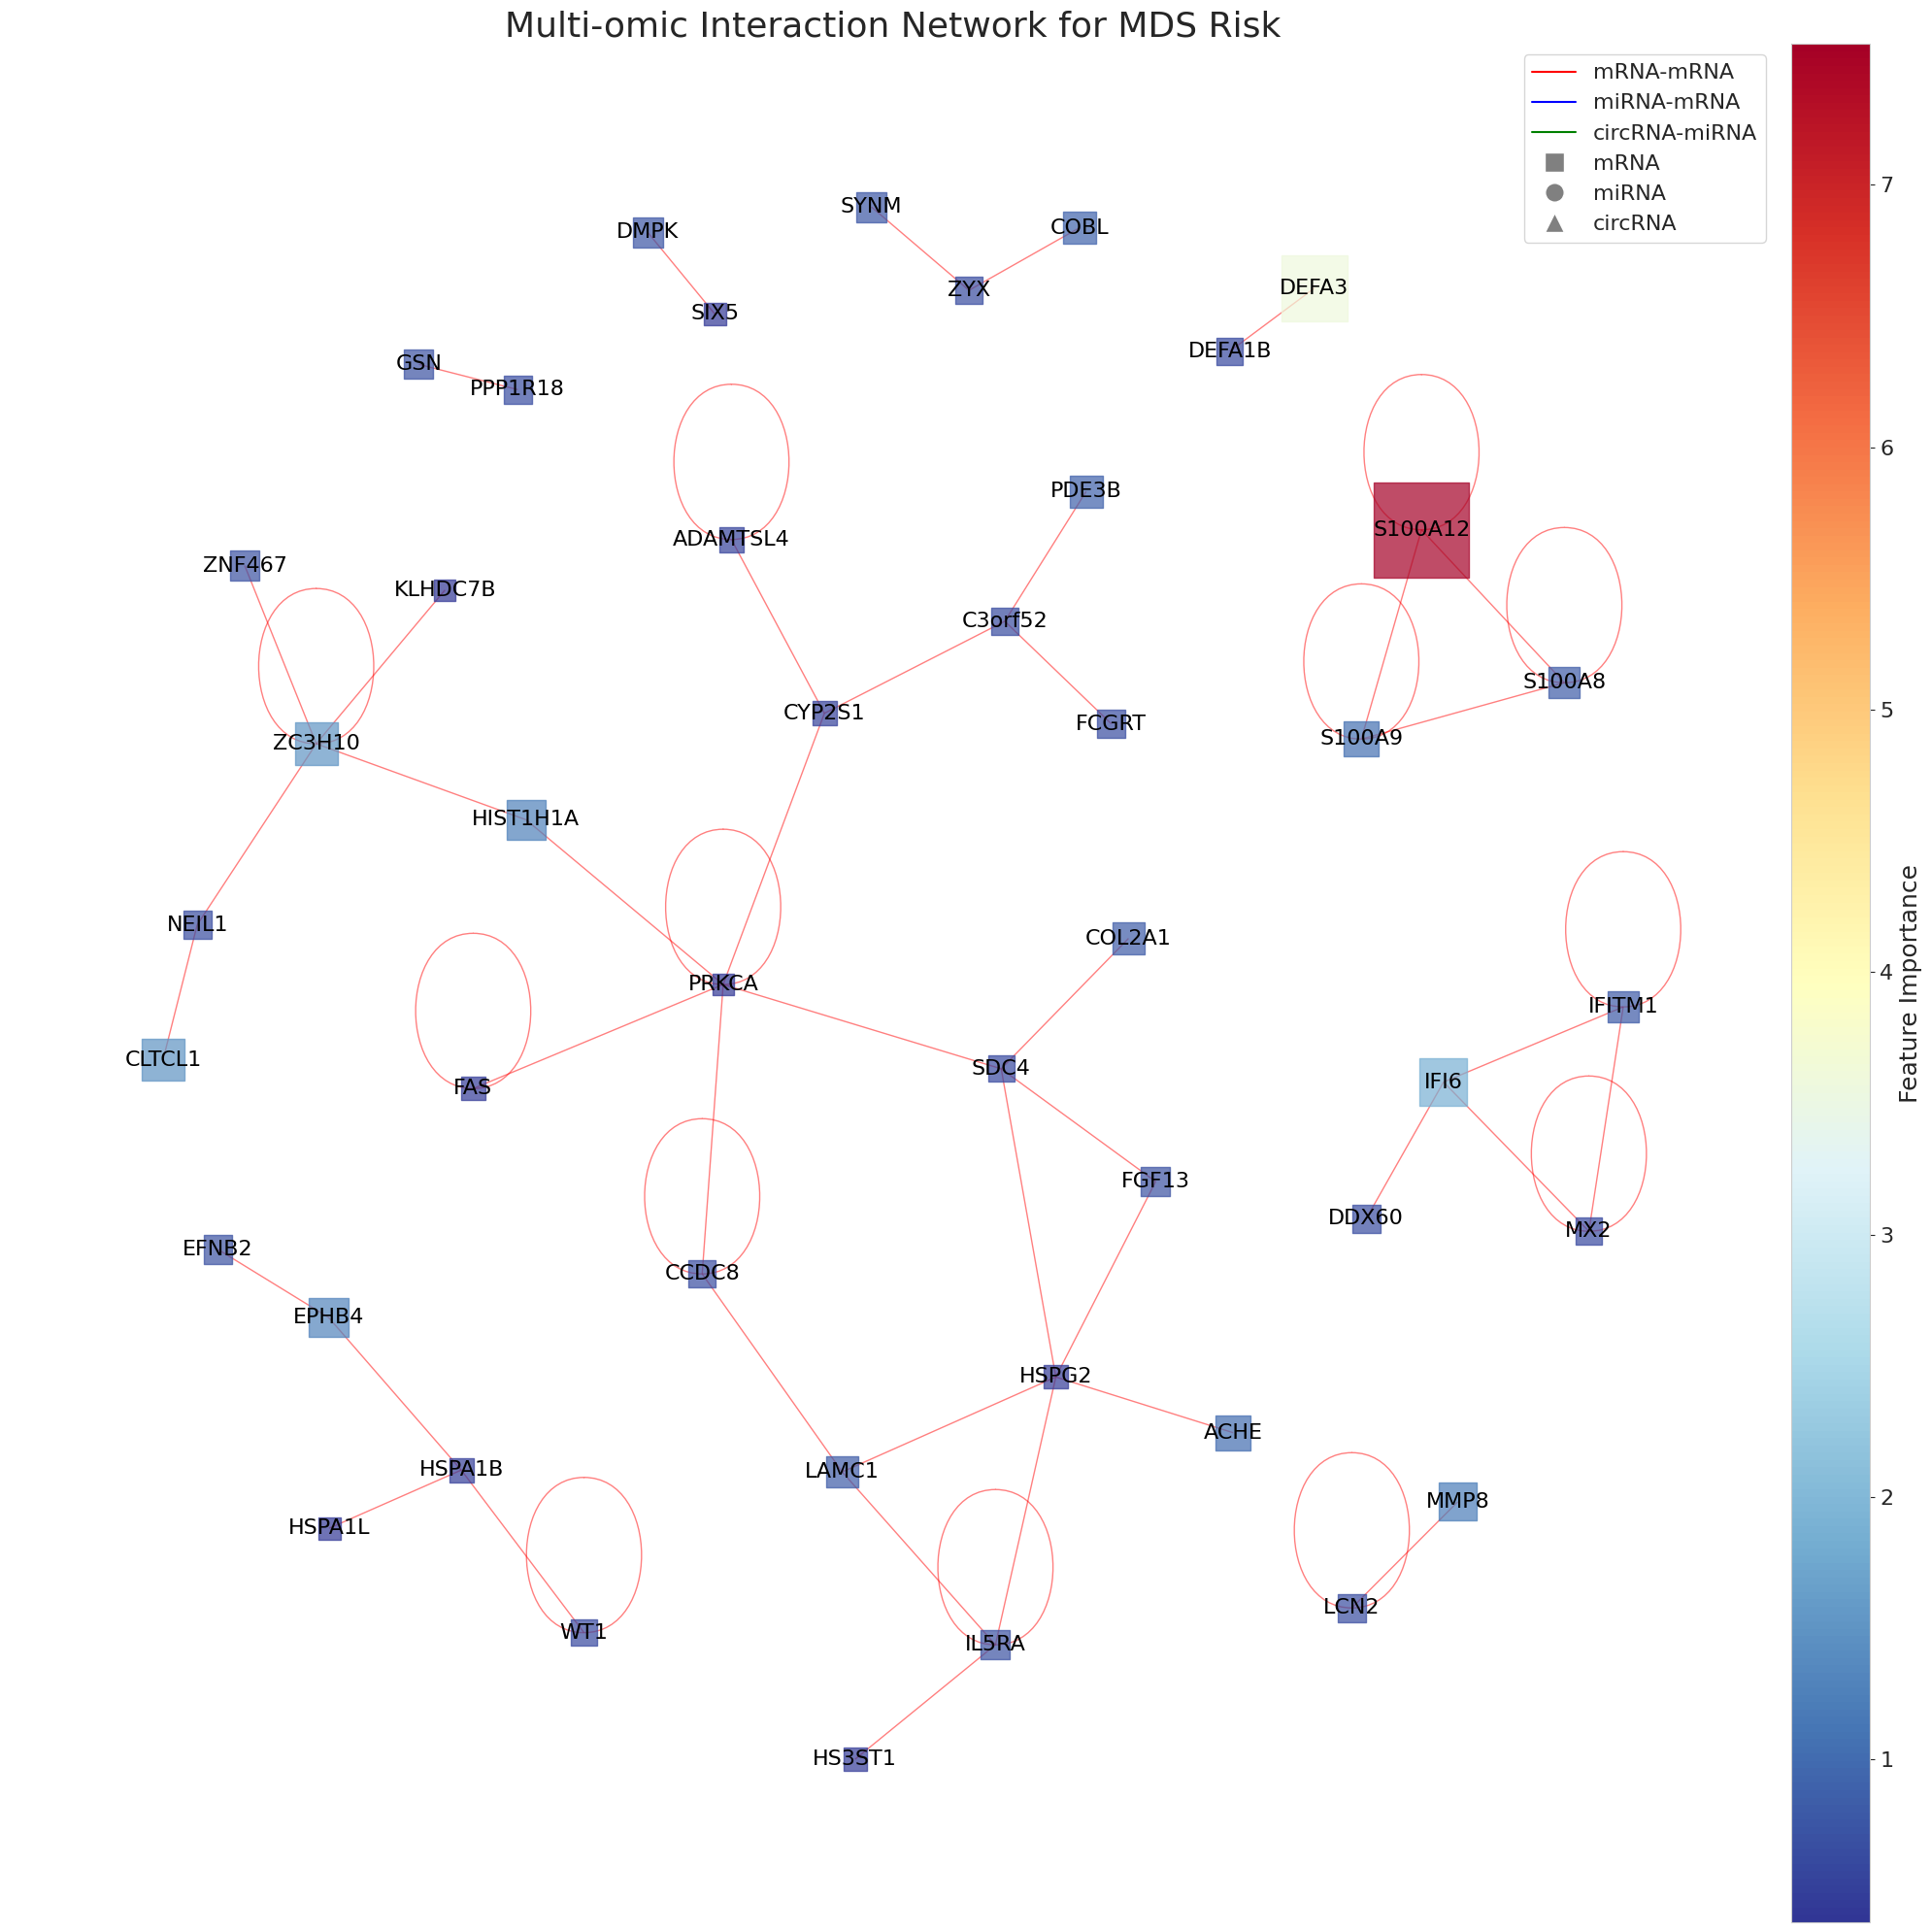

In [74]:
from src.plotting.graph_plotting import create_multi_omic_network, plot_multi_omic_network

# Example usage:
G = create_multi_omic_network(mrna_dict, mirna_dict, circrna_dict, 
                             mrna_A, mirna_gene_A, circrna_mirna_A)

# generate a random number
# seed = 8894 # 7306 - disease
# seed = 4580 # - risk
seed = np.random.randint(0, 10000)
print(seed)
fig = plot_multi_omic_network(
    G,
    seed=seed, 
    title="Multi-omic Interaction Network for MDS Risk",
    figsize=(20,20),
    max_iter=500,
    gravity=1.0,
    jitter_tolerance=2.0,
)
fig.savefig('plots/risk/multi_omic_network_genes_only.png', dpi=400)

- the DEFA gene family which has high scores here has been associated with different types of cancer but not with MDS it seems
- [Whole blood defensin mRNA expression is a predictive biomarker of docetaxel response in castration-resistant prostate cancer](https://pmc.ncbi.nlm.nih.gov/articles/PMC4527520/) 
- [S100A12 is a promising biomarker in papillary thyroid cancer](https://www.nature.com/articles/s41598-020-58534-1)
- [S100A8, S100A9 and S100A12 are strongly correlated with the occurrence and development of cancer](https://onlinelibrary.wiley.com/doi/10.1111/imm.13722)
- [S100A9 induces differentiation of acute myeloid leukemia cells through TLR4](https://pubmed.ncbi.nlm.nih.gov/28137827/)
- [S100 Proteins in Acute Myeloid Leukemia](https://pubmed.ncbi.nlm.nih.gov/30366122/)
- [Roles of Histone Deacetylases in Acute Myeloid Leukemia With Fusion Proteins](https://pmc.ncbi.nlm.nih.gov/articles/PMC8440836/) and [https://eurjmedres.biomedcentral.com/articles/10.1186/s40001-024-02108-8](https://eurjmedres.biomedcentral.com/articles/10.1186/s40001-024-02108-8)
- we have three histone genes here as important features
    - HIST1H2BN 4.245093017816544
    - HIST1H2AC 1.6199357211589813
    - HIST1H1A 1.2683670080441516

In [51]:
fig.savefig('plots/risk/multi_omic_network.png', dpi=400)

<Figure size 640x480 with 0 Axes>

[MiR-570 inhibits cell proliferation and glucose metabolism by targeting IRS1 and IRS2 in human chronic myelogenous leukemia](https://pmc.ncbi.nlm.nih.gov/articles/PMC5478775/)